In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("Lab3.ipynb")

# ESS 314: Lab 3
**Seismic refraction wave and ray tracing.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

 ### **Plotting travel-time curves in Python**

1. Imagine a source at the surface located 10 m from the first receiver, or geophone, in a 10-geophone line. The spacing between geophones is 10 m. We also know that the thickness of the layer closest to the surface is 20 m.

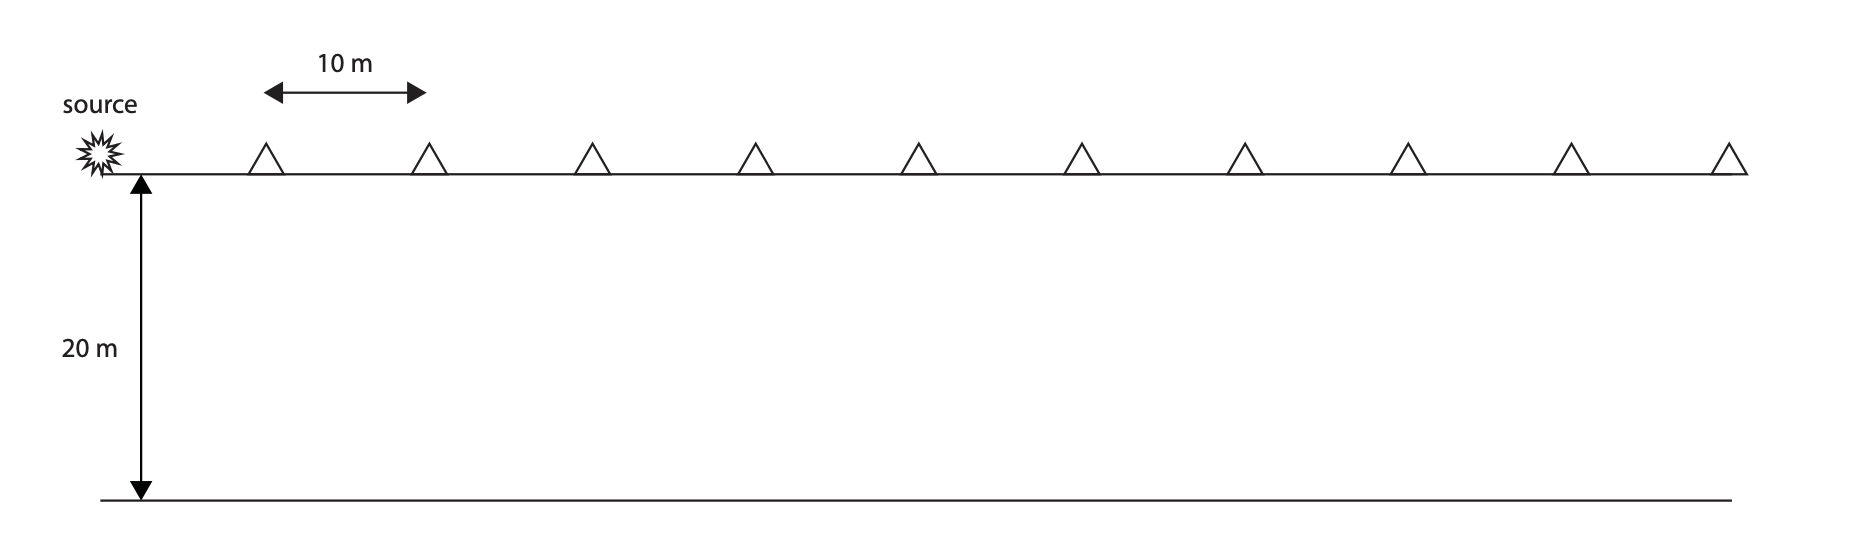

<!-- BEGIN QUESTION -->

**Question 1a:** For each geophone, sketch ray paths for (i) the direct wave and (ii)
the refracted waves on the diagram above. Submit your figure to GradeScope with filename `fig_1a.png`. (1 point)

<!-- END QUESTION -->

**Question 1b:** Write code that meets the criteria below to calculate the travel-time curves for the direct and refracted waves using the above configuration. Save the calculation in `t_dir` and `t_ref`. (2 points)

i. Assume the velocity of layer 1 is 2000 m/s and the velocity of layer 2 is 4000 m/s.


ii. This code should be similar to the code you wrote for Lab 2. Use vector operations, not a FOR loop, to do these calculations.


iii. The travel-time equation for refracted waves is provided in equations below.

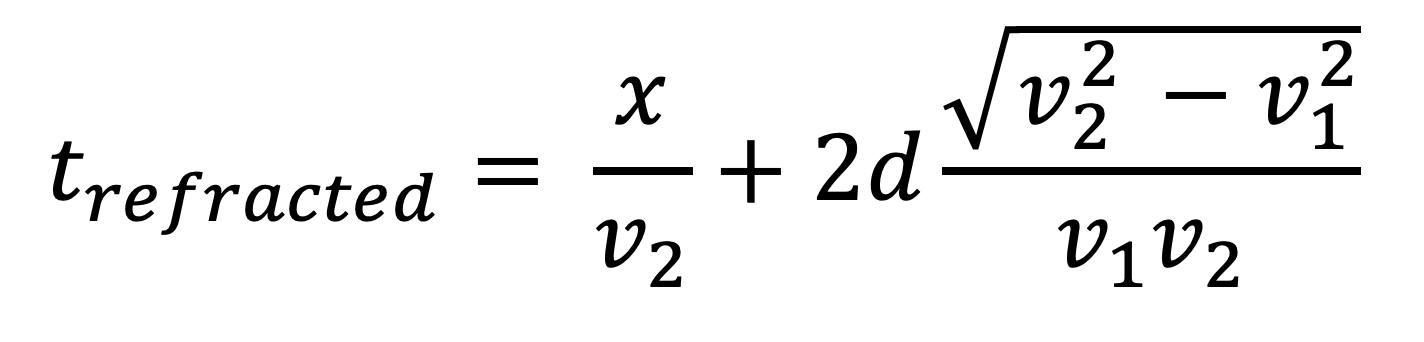

In [ ]:
# Type your answer here, replace "..." with your code
x  = np.arange(10, 101, 10)
d  = ...

v1 = ...
v2 = ...

t_direct = ...
t_refract = ...

In [ ]:
grader.check("q1b")

<!-- BEGIN QUESTION -->

**Question 1c:** Plot the travel-time curves on the same plot for both direct wave and refraction wave, and make sure to label axes and add a legend. Show plot below. (2 point)

In [ ]:
# Type your answer here, replace "..." with your code
plt.figure(figsize=(10, 5), dpi=100)
plt.plot()
...

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2:** Answer the following questions about the travel time curves you created above. (1 point each)

a. What is the slope of the direct wave curve?

b. What is the slope of the refracted wave curve?

c. What physical quantity can be derived from the slopes of these curves?

d. Why is the slope of the refracted wave curve shallower than that of the direct wave curve?

_Type your answer here, replacing this text._

<!-- END QUESTION -->

 ### **Using Cake to create time-distance plots**

`cake` is part of `pyrocko` Python toolkits that can be used to solve classical seismic ray theory problems for layered earth models (layer cake models). You can use preloaded models for ray tracing, or define your own (layered) Earth model. 

Learn more about this interesting package at https://pyrocko.org/docs/current/apps/cake/manual.html

In [ ]:
from pyrocko import cake

As mentioned, `cake` has several pre-defined Earth models like PREM. We can load it and print all the discontinuities in the PREM model. Some of the major interfaces you can find are the surface, Moho, CMB and ICB.

In [ ]:
prem = cake.load_model("prem-no-ocean.m")

for interface in prem.discontinuities():
    print(interface)

We now learn how to define our own Earth model and to solve the seismic ray tracing problem. An Earth model in cake is made by **Interfaces** and **Layers**. 

There are two types of interfaces in cake: `Surface` and `Interface`. You need to define the depth of the interface (in meters), and the material above/below the interface (You don't need to define the material above the interface if you are using the `Surface`). 

There are also two types of layers in cake: `HomogeneousLayer` and `GradientLayer`. Here, we will only define layers to be homogeneous. 

Code below defines a layered model, with one 20 meters homogeneous layer. The Vp of layer1 is `2000 (m/s)`, while Vs is `2000/1.78 (m/s)`. **In this lab, we won't use S-wave phases, so it is safe to assume Vs=Vp/1.78**

In [ ]:
m_layer1 = cake.Material(vp = 2000., vs = 2000/1.78) # define the material in layer 1

model = cake.LayeredModel()    # creat an empty model
model.append(cake.Surface(z = 0., mbelow = m_layer1))    # add the surface
model.append(cake.HomogeneousLayer(0., 20., m_layer1, name='layer1')) # add the first layer

We then define the source to be 0 meters depth, and arrange the receivers. Note that cake does not allow source to be strictly located at zero depth, so we use a very small depth (0.01 meter). It changes the travel time very slightly so it is ok. We also define receivers every 10 meters (10, 20, 30, 40, ..., 100), and convert it to degree by multiplying a constant `cake.m2d`.

In [ ]:
source_depth = 0.01 # in meters
distances = np.arange(10, 101, 10) * cake.m2d  # convert meter to degree

We also need to define the phases of interest for the ray tracing. Here the small `p` indicates that we are calculating P-wave that departing upward from the source (upward take-off direction). This is the direct wave from the source to the receiver.

Refer to the manual for more complex phase definition at https://pyrocko.org/docs/current/library/reference/pyrocko.cake.html#pyrocko.cake.PhaseDef

In [ ]:
phase = cake.PhaseDef('p')
print(phase)

Here, we calculate and save the travel time for each arrival. We save the location of the receiver, and the traveltime to `x_cake` and `t_direct_cake`, respectively. Note that we need to multiply a constant `cake.d2m` to convert distance from degree back to meter.

In [ ]:
# save the travel-time
x_direct_cake = [];
t_direct_cake = [];
for arrival in model.arrivals(distances, phases=phase, zstart=source_depth):
    x_direct_cake.append(arrival.x*cake.d2m)
    t_direct_cake.append(arrival.t)
    
    print('%13g %13g' % (arrival.x*cake.d2m, arrival.t))

<!-- BEGIN QUESTION -->

**Question 3a:** Compare the results of travel-time for the direct wave. You would need to plot the results from question 1 and from cake in the same figure (using `t_direct_cake` from the previous question). Make sure to label axes and add the legend clearly. (1 point).

In [ ]:
# Type your answer here, replace "..." with your code
plt.figure(figsize=(10, 5), dpi=100)
plt.scatter()
plt.plot()
plt.legend()
...

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3b:** What happen if you define the phase as capital P ("P") in the cells above? Does it output any arrivals? Why (not)? Try to find the answer in the manual at https://pyrocko.org/docs/current/library/reference/pyrocko.cake.html#pyrocko.cake.PhaseDef (1 point)

_Type your answer here, replacing this text._

<!-- END QUESTION -->

**Question 4a:** Now we add interfaces and more layers to the model. Following the model above, we add an interface called (interface 1) below layer 1. Below the interface 1 is layer 2 (40 meters depth, Vp = 4000 m/s). Still, we assume Vp/Vs = 1.78. Fill in the code below. (1 point)

<!-- BEGIN QUESTION -->



In [ ]:
# Type your answer here, replace "..." with your code
m_layer1 = cake.Material(vp = 2000., vs = 2000/1.78) # define layer 1 material
m_layer2 = cake.Material(vp = ..., vs = ...)         # define layer 2 material

model = cake.LayeredModel()                  # create an empty model
model.append(cake.Surface(z = 0., mbelow = m_layer1)) # add surface 
model.append(cake.HomogeneousLayer(0., 20., m_layer1, name='layer1'))  # add layer 1
model.append(cake.Interface(z = ..., mabove = m_layer1 mbelow = m_layer2 name = "interface1")) # add interface 1
model.append(cake.HomogeneousLayer(..., ..., ..., name='layer2')) # add layer 2
print(model)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4b:** We calculate the refraction wave that travel beneth interface1. We can compare the results from question 1 and from cake in the same figure. Answer the questions below based on what you plot. (4 points)
- Does the results from question 1 well match what `cake` produces? 
- What's the slope of the line? 
- Remember that we also arrange the receiver at 10 and 20 meters. Are there any observation at these distance? Why?
- We define the phase as `"Pv_(interface1)p"`. What does it mean? Why it is the same as the refraction wave? Again, you may want to refer to https://pyrocko.org/docs/current/library/reference/pyrocko.cake.html#pyrocko.cake.PhaseDef

In [ ]:
source_depth = 0.01 # in meters
distances = np.arange(10, 101, 10) * cake.m2d  # convert meter to degree
phase = cake.PhaseDef('Pv_(interface1)p')

x_refract1_cake = [];
t_refract1_cake = [];
for arrival in model.arrivals(distances, phases=phase, zstart=source_depth):
    x_refract1_cake.append(arrival.x*cake.d2m)
    t_refract1_cake.append(arrival.t)
    
plt.figure(figsize=(10, 5), dpi=100)
plt.scatter(x_refract1_cake, t_refract1_cake)
plt.plot(x, t_refract)

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 5a:** Plot the travel time for both the direct wave and refraction wave, from both **traveltime equation** and **cake**, **in the same plot**. You would see two lines cross at a point. Label your figure well (2 points)

In [ ]:
# Type your answer here, replace "..." with your code
plt.figure(figsize=(10, 5), dpi=100)
plt.plot()
plt.legend()
...

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 5b:** Calculate the crossover distance using the traveltime equations for the direct and refracted waves. Please show your work. Does your calculation agree with the plot? (2 points)

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 5c:** If you decrease the layer thickness by a factor of 2 (i.e., from 20 m to 10 m), by what factor does the crossover distance change? (1 point)

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 6:** On the cross section below, illustrate (i) the critical angle and (ii) the crossover distance by drawing ray paths and showing angles. Make sure to pick the correct geophone at which the crossover occurs in your drawing. Submit your figure to GradeScope with filename `fig_6.png`. (2 point)

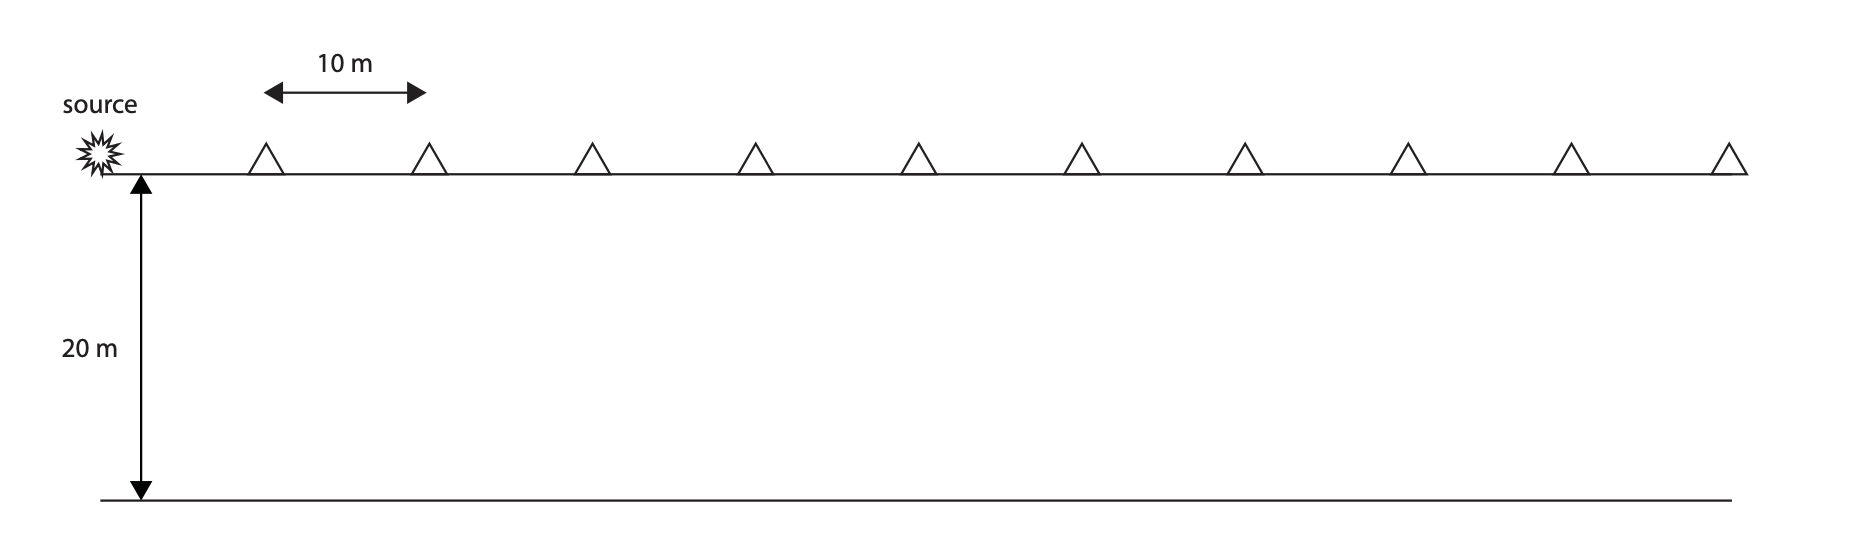

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 7:** Now we are going to make the model a little more complicated. Create a model to have the following layers. Note that velocity in the table is the velocity of P-wave. Also remember that for Vs, we assume it's equal to Vp/1.78.

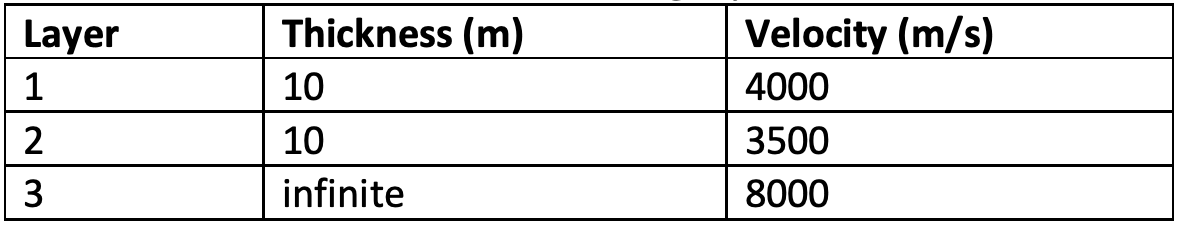

Try to plot the refraction wave traveling along the interface between layer 1 and layer 2. Does the model return any arrival? Why? (2 points)

In [ ]:
# Type your answer here, replace "..." with your code
m_layer1 = cake.Material(vp = ..., vs = ...) # layer 1
m_layer2 = cake.Material(vp = ..., vs = ...) # layer 2
m_layer3 = cake.Material(vp = ..., vs = ...) # layer 3

model = cake.LayeredModel()
model.append(cake.Surface(z = 0., mbelow = m_layer1))
model.append(cake.HomogeneousLayer(0., 10., m_layer1, name='layer1'))
model.append(cake.Interface(z = 10., mabove = m_layer1, mbelow = m_layer2, name = "interface1"))
model.append(cake.HomogeneousLayer(10., 20., m_layer2, name='layer2'))
model.append(cake.Interface(z = ..., mabove = m_layer2, mbelow = m_layer3, name = "interface2"))
model.append(cake.HomogeneousLayer(..., ..., m_layer3, name='layer3'))

source_depth = 0.01 # in meters
distances = np.arange(10, 101, 10) * cake.m2d  # convert meter to degree
phase = cake.PhaseDef('Pv_(interface1)p')

for arrival in model.arrivals(distances, phases=phase, zstart=source_depth):
    print('%13g %13g' % (arrival.x*cake.d2m, arrival.t))

We have just identified a problem with the seismic refraction method: refracted waves do not propagate through a low-velocity layer! As a result, we cannot determine the wave speed or thickness of a low-velocity layer. This highlights the importance of using multiple methods in geophysical studies. As you'll learn next week, low velocity layers can be detected with a reflection study.

<!-- END QUESTION -->



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

These are the lab 3 of ESS 314 Autumn 2023.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)